In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
!pwd

/content


In [4]:
!ls

drive  sample_data


In [5]:
%cd "/content/drive/MyDrive/Colab Notebooks/voice_emotion_recognition/src/model_architectures"

/content/drive/MyDrive/Colab Notebooks/voice_emotion_recognition/src/model_architectures


In [6]:
!pwd

/content/drive/MyDrive/Colab Notebooks/voice_emotion_recognition/src/model_architectures


In [7]:
!ls

model.ipynb  model_v2.ipynb  model_v4.ipynb
model.py     model_v2.py     model_v5.ipynb


In [25]:
# model_v5.ipynb

# ============================
# 📦 1. Imports
# ============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Reshape, Bidirectional, GRU, Dense)
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout, Bidirectional, GRU, Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [18]:

# ============================
# 📂 2. Load Data
# ============================
# Replace with your actual loading if stored as .npy
# X = np.load('path_to_X.npy')
# y = np.load('path_to_y.npy')
X = np.load("../../data/features/features_v5.npy") #data\features\features_v5.npy
y = np.load("../../data/features/labels_v5.npy",allow_pickle=True)


print("X shape:", X.shape)  # (2880, 128, 173, 1)
print("y shape:", y.shape)  # (2880,)

X = X.squeeze().transpose(0, 2, 1)  # Final shape: (2880, 173, 128)
print("X shape:", X.shape)
print("y shape:", y.shape)  # (2880,)


X shape: (2880, 128, 173, 1)
y shape: (2880,)
X shape: (2880, 173, 128)
y shape: (2880,)


In [19]:

# ============================
# 🎯 3. Preprocess Labels
# ============================
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)      # 'neutral' → 0, 'happy' → 1, ...

# One-hot encode
num_classes = len(np.unique(y_encoded))
y_cat = to_categorical(y_encoded, num_classes=num_classes)

y_cat.shape  # (2880, 8) if 8 classes

(2880, 8)

In [20]:
emotion_labels = label_encoder.classes_
print("Label classes:", emotion_labels)
# ============================
emotion_labels[2]


Label classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


np.str_('disgust')

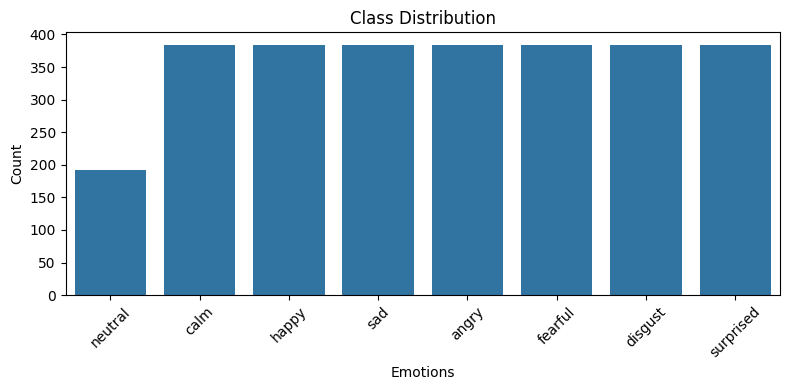

In [21]:
# ✅ 5. Visualize Class Distribution
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x=label_encoder.inverse_transform(y_encoded))
plt.title("Class Distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:

# ============================
# 🔀 4. Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)


In [17]:

# # ============================
# # 🧠 5. Build Modelv5
# # ============================
# input_shape = (128, 173, 1)

# inp = Input(shape=input_shape)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.3)(x)

# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.3)(x)

# # Reshape for GRU
# x = Reshape((x.shape[1], x.shape[2] * x.shape[3]))(x)
# x = Bidirectional(GRU(64, return_sequences=False))(x)
# x = Dropout(0.4)(x)

# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)

# out = Dense(num_classes, activation='softmax')(x)

# model = Model(inputs=inp, outputs=out)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 173, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 173, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 173, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 2752)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │     1,082,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,110,088 (4.23 MB)

 Trainable params: 1,109,896 (4.23 MB)

 Non-trainable params: 192 (768.00 B)

In [26]:
# ✅ 6. Build model_v5: CNN + BiGRU
model = Sequential([
    Input(shape=(173, 128)),
    Conv1D(64, 5, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, 5, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 173, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 173, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 86, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 86, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 86, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 86, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,152 (649.03 KB)

 Trainable params: 165,768 (647.53 KB)

 Non-trainable params: 384 (1.50 KB)

In [27]:

# ============================
# 🚀 6. Train the Model
# ============================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_modelv5.keras", save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.1351 - loss: 2.2367 - val_accuracy: 0.1476 - val_loss: 2.0757
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1826 - loss: 2.0468 - val_accuracy: 0.1701 - val_loss: 2.0406
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1880 - loss: 2.0267 - val_accuracy: 0.2101 - val_loss: 1.9802
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1975 - loss: 2.0034 - val_accuracy: 0.2326 - val_loss: 1.9290
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2079 - loss: 1.9526 - val_accuracy: 0.2865 - val_loss: 1.8582
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2806 - loss: 1.8685 - val_accuracy: 0.1875 - val_loss: 2.1608
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2480 - loss: 1.8632 - val_accuracy: 0.3247 - val_loss: 1.7510
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3222 - loss: 1.7668 - val_accuracy: 0.3003 - v

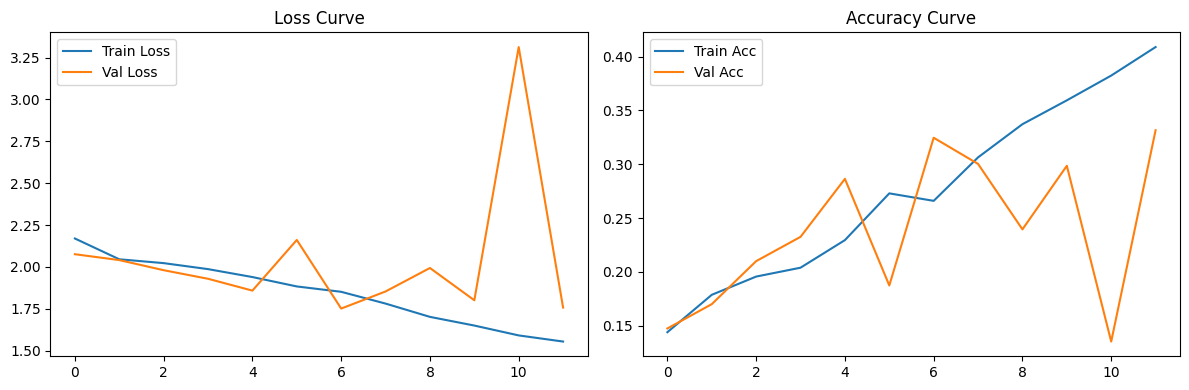

In [28]:

# ============================
# 📈 7. Plot Training Curves
# ============================
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy (v5):", test_acc)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3195 - loss: 1.7479
Test accuracy (v5): 0.3246527910232544


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.53      0.39        76
           1       0.35      0.75      0.48        77
           2       0.29      0.19      0.23        77
           3       0.40      0.31      0.35        77
           4       0.00      0.00      0.00        77
           5       0.33      0.18      0.24        38
           6       0.21      0.05      0.08        77
           7       0.32      0.51      0.39        77

    accuracy                           0.32       576
   macro avg       0.28      0.32      0.27       576
weighted avg       0.27      0.32      0.27       576



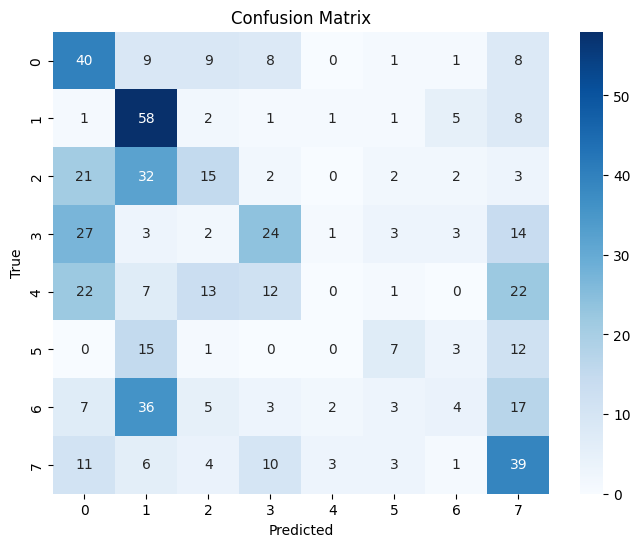

In [30]:

# ============================
# 📊 8. Evaluation
# ============================
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

# ============================
# 💾 9. Save Final Model
# ============================
model.save("final_model_v5.h5")
print("Model saved successfully.")
